## Lesson 5 - Mulitple Linear Regression

This is a summary of Lesson 5 of **STAT 501 - Multiple Linear Regression** and is done in Python

https://newonlinecourses.science.psu.edu/stat501/node/283/

In [2]:
data = pd.read_excel('piq.xlsx')

data.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


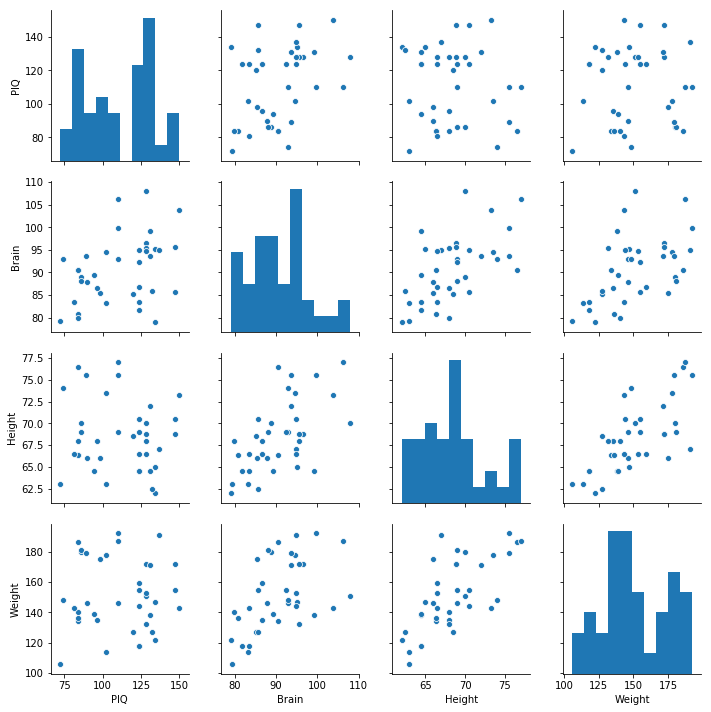

In [3]:
sns.pairplot(data)

**Model**

We always start a regression analysis by formulating a model for our data. Below is the model with three quantitative predictors:

$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3})+\epsilon_i$


where:

- $y_i$ is the intelligence (PIQ) of student $i$
- $x_{i1}$ is the brain size (MRI) of student $i$
- $x_{i2}$ is the height (Height) of student $i$
- $x_{i3}$ is the weight (Weight) of student $i$

and the independent error terms $\epsilon_i$ follow a normal distribution of mean 0 and equal variance $\sigma^2$

In order to build a model, we use OLS.

In [6]:
X = data[['Brain', 'Height', 'Weight']]
y = data['PIQ']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Mon, 08 Jul 2019   Prob (F-statistic):            0.00722
Time:                        23:55:06   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3536     62.971      1.768      0.086     -16.619     239.326
Brain          2.0604      0.563      3.657      0.001       0.915       3.205
Height        -2.7319      1.229     -2.222      0.033      -5.230      -0.233
Weight         0.0006      0.197      0.003      0.998      -0.400       0.401
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.088
Skew:                           0.409   Prob(JB):                        0.580
Kurtosis:                       2.859   Cond. No.                     3.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key findings - 

- $R^2$ value is 29.49%. This tells us that 29.49% of the variation in intelligence, as quantified by PIQ, is reduced by taking into account brain size, height and weight.
- The Adjusted $R^2$ value — denoted "Adj. R-squared" — is 23.27%. When considering different multiple linear regression models for PIQ, we could use this value to help compare the models.
- The P-values for the t-tests appearing in the table of estimates suggest that the slope parameters for Brain (P = 0.001) and Height (P = 0.033) are significantly different from 0, while the slope parameter for Weight (P = 0.998) is not.
- The P-value for the analysis of variance F-test (P = 0.007) suggests that the model containing Brain, Height and Weight is more useful in predicting intelligence than not taking into account the three predictors. (Note that this does not tell us that the model with the three predictors is the best model!)

## The Multiple Linear Regression Model

**Notation for the Population Model**

A population model for a multiple linear regression model that relates a y-variable to p -1 x-variables is written as:

\begin{equation}  y_{i}=\beta_{0}+\beta_{1}x_{i,1}+\beta_{2}x_{i,2}+\ldots+\beta_{p-1}x_{i,p-1}+\epsilon_{i}.  \end{equation}

- We assume that the $\epsilon_i$ have a normal distribution with mean 0 and constant variance $\sigma^2$. These are the same assumptions that we used in simple regression with one x-variable.

- The subscript $i$ refers to the $i^{th}$ individual or unit in the population. In the notation for the x-variables, the subscript following $i$ simply denotes which x-variable it is.

- The word "linear" in "multiple linear regression" refers to the fact that the model is linear in the parameters, $\beta_0, \beta_1, \ldots, \beta_{p-1}$. This simply means that each parameter multiplies an x-variable, while the regression function is a sum of these "parameter times x-variable" terms. Each x-variable can be a predictor variable or a transformation of predictor variables (such as the square of a predictor variable or two predictor variables multiplied together). Allowing non-linear transformation of predictor variables like this enables the multiple linear regression model to represent non-linear relationships between the response variable and the predictor variables. Note that even $\beta_0$ represents a "parameter times x-variable" term if you think of the x-variable that is multiplied by $\beta_0$ as being the constant function "1."


**Estimates of the Model Parameters**

- The estimates of the $\beta$ coefficients are the values that minimize the sum of squared errors for the sample.
- The letter b is used to represent a sample estimate of a β coefficient. Thus b0 is the sample estimate of β0, b1 is the sample estimate of β1, and so on.
- $\textrm{MSE}=\frac{\textrm{SSE}}{n-p}$ estimates $\sigma^2$, the variance fot he errors. In the formula, n = sample size, p = number of $\beta$ coeffecients in model (including the intercept) and SSE = sum of the squared erros. Notice that for simple linear refression p = 2. Thus, we get the formula for MSE that we introduced in that context of one predictor
- $S = \sqrt{MSE}$ estimates $\sigma$ and is known as the regression standard error or the residual standard error. 
- In the case of the two predictors, the estimated regression equation yields a plane. For more than two predictors, the estimated regression equation yields a hyperplane.


** Interpretation of the Model Parameters **

- Each β coefficient represents the change in the mean response, E(y), per unit increase in the associated predictor variable when all the other predictors are held constant.
- The intercept term, $\beta_0$, represents the mean response, E($y$), when all the predictors $x_1$, $x_2$, $...$, $x_{p-1}$ are all zero (which may or may not have any practical meaning).

**Predicted Values and Residuals**

- The predicted value is calculated as $\hat{y}_{i}=b_{0}+b_{1}x_{i,1}+b_{2}x_{i,2}+\ldots+b_{p-1}x_{i,p-1}$, where $b$ values come from statistical software and the $x$-values are specified by us.
- A residual (error) term is calculated as $e_i = y_i - \hat{y}_i$, the difference between actual and predicted value of $y$.
- A plot of residuals versus predicted values ideally should resemble a horizontal random band. Departures from this form indicates difficulties with the model and/or data. 
- Other residual analyses can be done exactly as we did in simple regression. For instance, we might wish to examine a normal probability plot (NPP) of the residuals. Additional plots to consider are plots of residuals versus each x-variable separately. 


ANOVA Table

| Source     | df    | SS   | MS                  | F         |
|------------|-------|------|---------------------|-----------|
| Regression | p – 1 | SSR  | MSR = SSR / (p – 1) | MSR / MSE |
| Error      | n – p | SSE  | MSE = SSE / (n – p) |           |
| Total      | n – 1 | SSTO |                     |           |

**Coefficient of Determination, R-squared, and Adjusted R-squared**

- As in simple linear regression, $R^2=\frac{SSR}{SSTO}=1-\frac{SSE}{SSTO}$, and represents the proportion of variation in $y$ (about its mean) "explained" by the multiple linear regression model with predictors, $x_1$, $x_2$, $...$.
- $R^2$ always increases as more predictors are added to a MLR model, even if the predictors are unrelated to the response variable. Thus by itself the $R^2$ cannot be used to identify which predictors should be included in a model and which should be excluded. This is because $SSE$ will decrease while $SSTO$ remains constant as you keep adding new predictor variables.
- Alternatively, we can use **Adjusted $R^2$** to see which predictors should be included in the model and which should be excluded. 
Adjusted $ R^2=1-\left(\frac{n-1}{n-p}\right)(1-R^2)$


**Significance Testing of Each Variable**

Suppose we have three variables in a MLR model, how do we know a particular x-variable is making a useful contribution to the model given that there are other x-variables in the model?

$y=\beta  _{0}+\beta _{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+\epsilon$

We will need to do hypothesis testing:

$\begin{align*}  \nonumber H_{0}&:\beta_{1}=0 \\ \nonumber H_{A}&:\beta_{1}\neq  0. \end{align*}$

Based on the hypotheses, we then see if a change in the x-variable results in a change in y. If not, then we cannot reject the null hypothesis. 

t* = (sample coefficient - hypothesized value) / standard error of coefficient.

$t^{*}=\frac{b_{1}-0}{\textrm{se}(b_{1})}=\frac{b_{1}}{\textrm{se}(b_{1})}$

In this case, statsmodels will spit out the p-value.

**A Matrix Formulation of the Multiple Regression Model**

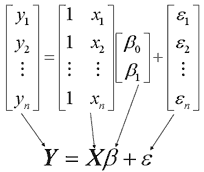